### Comparison on different models, class, scoring
we need to consider the best model between class on the recall scoring

we see that esemble is the best for class 3 (0,83) and class 2 (0.77)

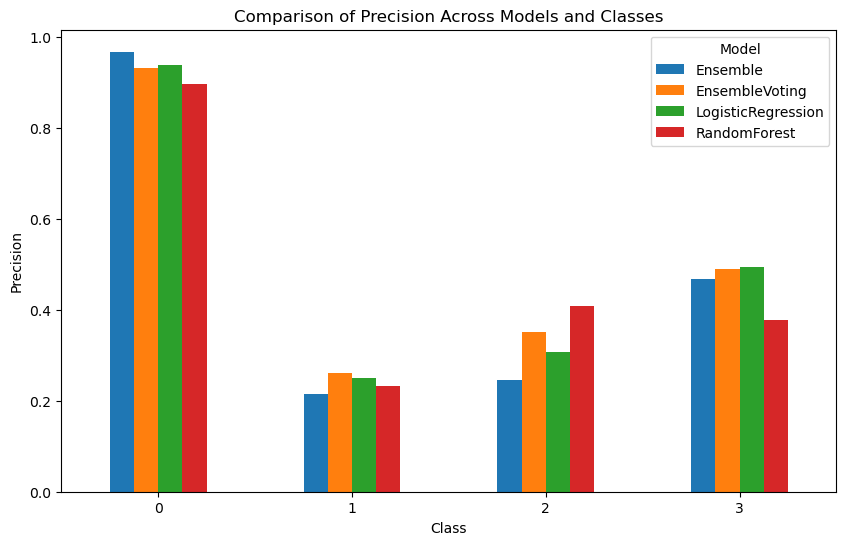

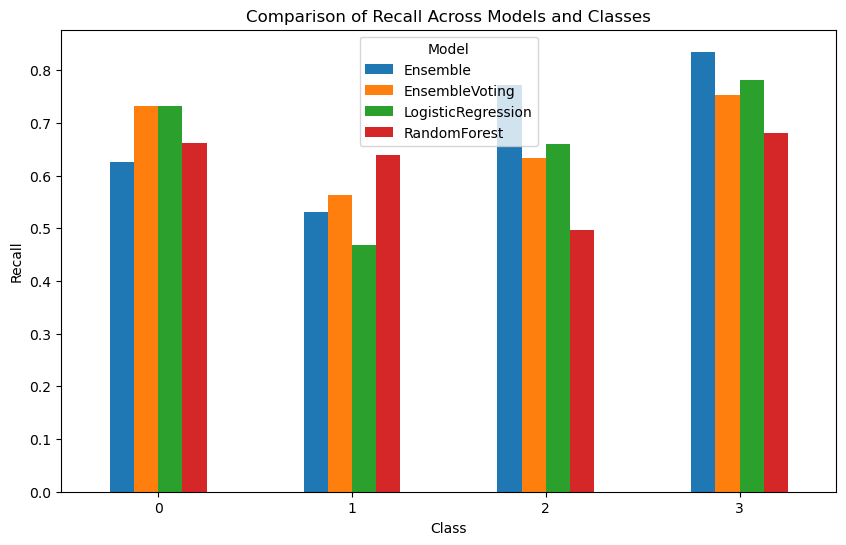

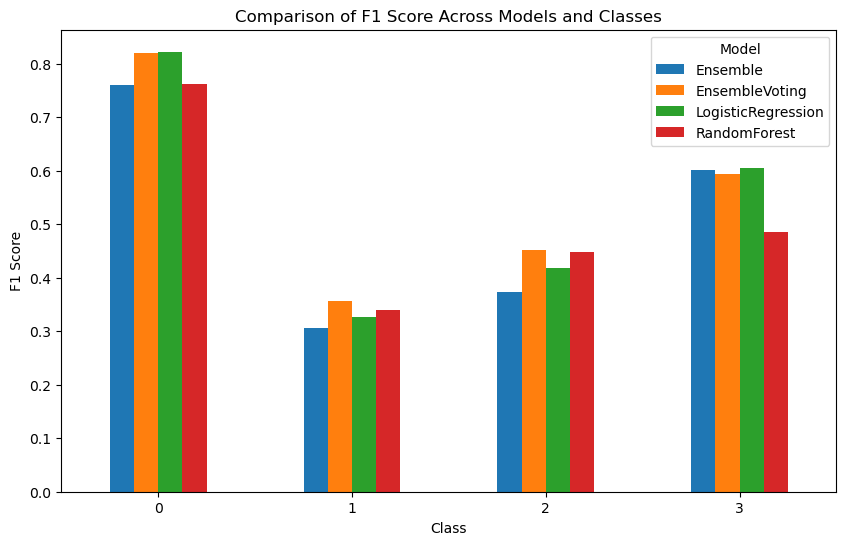

In [2]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
files = {
    "LogisticRegression": "data_output/Lav_1_work_3.3-LR_W.pkl",
    "RandomForest": "data_output/Lav_1_work_3.3-RF_W.pkl",
    "EnsembleVoting": "data_output/Lav_1_work_3.3-Esemble_voting_W.pkl",
    "Ensemble": "data_output/Lav_1_work_3.3-Esemble_W.pkl"
}

# Load data using joblib
models_data = {}
for model_name, file_path in files.items():
    models_data[model_name] = joblib.load(file_path)

# Initialize an empty list to store results
results = []

for model_name, data in models_data.items():
    if isinstance(data, list):  # For LR and RF
        report = data[0]["Class Report"]
        for class_label, metrics in report.items():
            if class_label.isdigit():  # Exclude macro and weighted avg
                results.append({
                    "Model": model_name,
                    "Class": class_label,
                    "Precision": metrics["precision"],
                    "Recall": metrics["recall"],
                    "F1 Score": metrics["f1-score"]
                })
    elif isinstance(data, dict):  # For Ensemble methods
        for class_label, metrics in zip(
            range(len(data["precision_per_class"])),  # Assume 0, 1, 2, 3...
            zip(data["precision_per_class"], data["recall_per_class"], data["f1_per_class"])
        ):
            results.append({
                "Model": model_name,
                "Class": str(class_label),
                "Precision": metrics[0],
                "Recall": metrics[1],
                "F1 Score": metrics[2]
            })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)


# Visualize the comparison
for metric in ["Precision", "Recall", "F1 Score"]:
    df_pivot = df_results.pivot(index="Class", columns="Model", values=metric)
    df_pivot.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Comparison of {metric} Across Models and Classes")
    plt.ylabel(metric)
    plt.xlabel("Class")
    plt.xticks(rotation=0)
    plt.legend(title="Model")
    plt.savefig(f"Img/Comparison of {metric} Across Models and Classes")
    plt.show()


In [3]:
df_results

,Model,Class,Precision,Recall,F1 Score
0,LogisticRegression,0,0.938922,0.731180,0.822131
1,LogisticRegression,1,0.251020,0.468837,0.326974
2,LogisticRegression,2,0.306482,0.659146,0.418414
3,LogisticRegression,3,0.493509,0.781288,0.604916
4,RandomForest,0,0.898023,0.662482,0.762476
5,RandomForest,1,0.231775,0.638062,0.340033
6,RandomForest,2,0.409302,0.496374,0.448653
7,RandomForest,3,0.376930,0.681595,0.485418
8,EnsembleVoting,0,0.931435,0.732690,0.820194
9,EnsembleVoting,1,0.261302,0.564014,0.357143
